## Bernstein-Vazirani Algorithm

<!-- Consider a hidden Boolean function $f$ which takes in a string of $n$ bits $\{x_0, x_1, \ldots x_{n-1}\}$ and returns 1 for only a unique n-bit string $s = \{s_0, s_1, \ldots s_{n-1}\}$ and 0 otherwise. -->
Consider a hidden Boolean function $f(\{x_0, x_1, \ldots x_{n-1}\})$ such that $f: \{0, 1\}^n \rightarrow \{0, 1\}$ and returns 1 for only a unique n-bit string $s = \{s_0, s_1, \ldots s_{n-1}\}$ and 0 otherwise. As an "extension" of the Deutsch-Josza problem, we are now given a black box that instead of just balanced or constant, can now compute for some $x$, $f(x) = s \cdot x \mod 2$ where $s \cdot x$.

How many attempts do we need to make in order to find the secret number $s$?

Classically, we covered two approaches. 

For an **n-bit secret number**, the first approach is to try all possible numbers from 0 to $2^n-1$. **This leads to an exponential number of attempts as $n$ grows.**

The second approach assumes that if the box isn't just giving a yes/no result if the number matches, but instead computes $s.x$ modulo 2, (this is a yes/no result as well, but we are now computing the bitwise AND between the two numbers $s$ and $x$, and adding up the results, and finally returning the sum modulo 2) then we can be a bit more clever and give the box $n$ different inputs (namely $2^0, 2^1, 2^2, \ldots, 2^{n-1}$) to reveal each of its bits. Check out the video to see how this works. **This method means that we would need to make $n$ attempts to find the secret number.**

<div align="center">
<iframe src="https://www.youtube.com/embed/sqJIpHYl7oo" width="560" height="315" frameborder="0" allowfullscreen></iframe>
</div>

You can visualize the quantum approach as shown:

<div align="center">
<img src="../docs/assets/bv1.png" width="500"/>
</div>

where, we initialise $|+\rangle^{\otimes n}$ for all inputs (full superposition), act our function, controlled on a $|-\rangle$ ancilla, and then measure out the result $|S\rangle$.

# Building the circuit for the Bernstein-Vazirani algorithm

We begin by writing down the secret number.

In [1]:
s = '110101'

Then, let's import Qiskit to begin building the circuit.

In [2]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit

# we need n+1 bits for some number of n bits
n = len(s)

The algorithm has four main parts.

0. **Initialize the first $n$ qubits in the state $\vert0\rangle$, and the last qubit in the $\vert1\rangle$ state.** In Qiskit, all qubits are initialized in the $\vert0\rangle$ state, so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize it to $\vert1\rangle$ state by applying an $X$ gate.

1. **Apply Hadamard gates to all qubits.**

2. **Build the box containing the secret number (also known as an "oracle").** We will build it as a function that computes $s.x$ modulo 2 by applying $CX$ gates from the first $n$ qubits onto the last qubit whenever there is a $1$ in the secret number. We will do this in reverse order, meaning that the there will be a $CX$ gate from the $n$th qubit to the last qubit if the first bit of the secret number is 1. 

3. **Measure the first $n$ qubits in the Bell basis.** This means applying Hadamard gates to the first $n$ qubits again before applying measurements.

In [3]:
circuit = QuantumCircuit(n+1,n)
# Preparing to apply H
circuit.x(n) # last one will become |-\rangle automatically
circuit.barrier()

circuit.h(range(n+1))
circuit.barrier()

# Encoding the oracle
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        circuit.cx(ii, n)

circuit.barrier()

# Applying H again and measuring
circuit.h(range(n+1))
circuit.barrier()
circuit.measure(range(n), range(n))

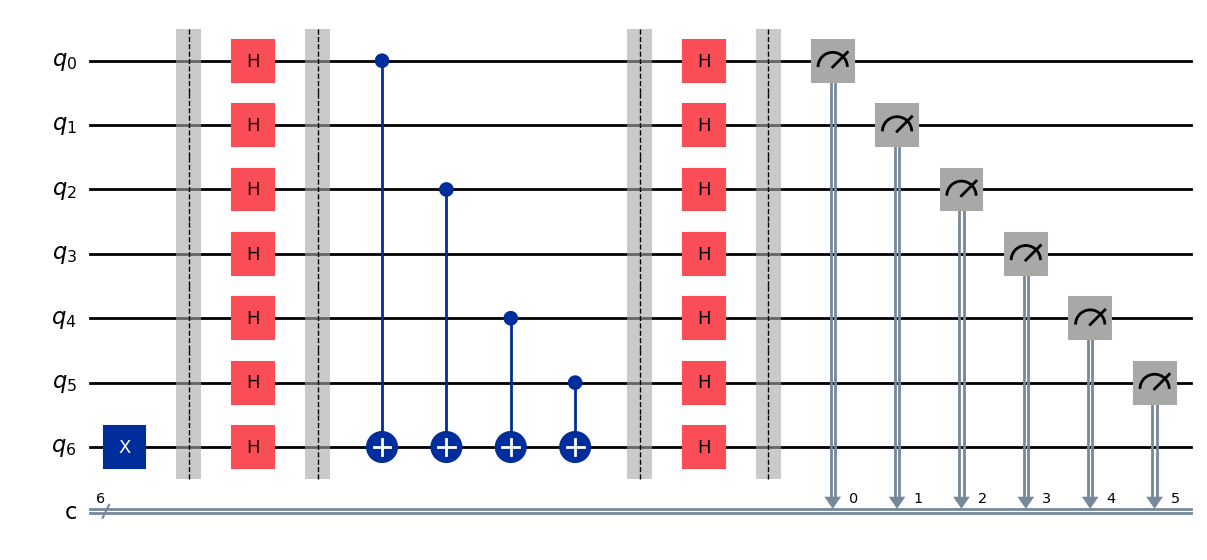

In [4]:
circuit.draw(output='mpl')

# Running the Bernstein-Vazirani algorithm

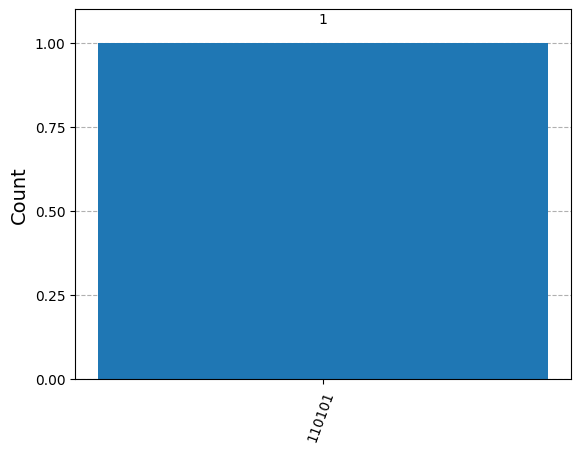

In [5]:
sim = AerSimulator()
result = sim.run(circuit, shots=1).result()
plot_histogram(result.get_counts(circuit))

In fact, setting the number of shots to 1000, we can still see that 100% of the results contain the secret number.

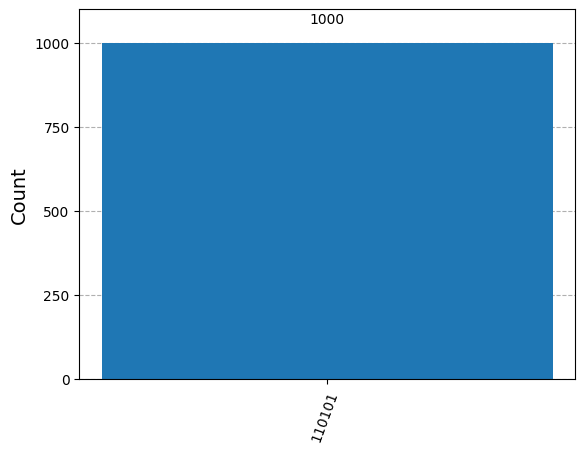

In [6]:
result = sim.run(circuit, shots=1000).result()
plot_histogram(result.get_counts(circuit))